In [12]:
import numpy as np
np.random.seed(1337)
from keras.models import Sequential
from keras.models import Model,load_model
from keras.layers import Dense
import matplotlib.pyplot  as plt
%matplotlib inline

In [2]:
# create data set
X = np.linspace(-1, 1, 200)
np.random.shuffle(X)
Y = 0.5*X + 2 + np.random.normal(0, 0.05, (200,))

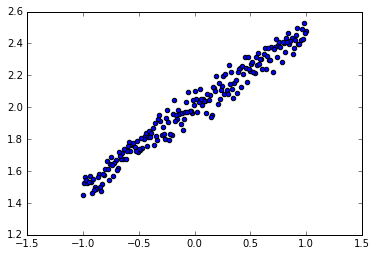

In [3]:
# plot data
plt.scatter(X,Y)
plt.show()

In [4]:
X_train, Y_train = X[:160], Y[:160]
X_test, Y_test = X[160:], Y[160:]

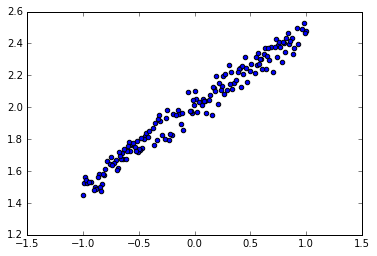

In [5]:
plt.scatter(X_train,Y_train)
plt.show()

In [6]:
# build a nn 
# method 1:
# Sequential为按顺序建立的 model
# Dense -> FC
model = Sequential()
# .add()
model.add(Dense(output_dim=1,input_dim=1))
# second layer not support input_dim param


# choose loss func and opt method
model.compile(loss='mse',optimizer='sgd',metrics=['accuracy'])
model.summary()




____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 1)             2           dense_input_1[0][0]              
Total params: 2
____________________________________________________________________________________________________


In [8]:
model.fit(X_train, Y_train, batch_size=40, nb_epoch=120, verbose=0)

# save model
model.save('reg.h5') # pip install h5py
del model

In [13]:
# load model
model = load_model('reg.h5')

"""
# save and load weights
model.save_weights('my_model_weights.h5')
model.load_weights('my_model_weights.h5')
# save and load fresh network without trained weights
from keras.models import model_from_json
json_string = model.to_json()
model = model_from_json(json_string)
"""


# train
for step in range(301):
    cost = model.train_on_batch(X_train, Y_train)
    if step %  100 ==0:
        print('train cost ', cost)
        

('train cost ', [0.0026223026, 0.0])
('train cost ', [0.0026216521, 0.0])
('train cost ', [0.0026214849, 0.0])
('train cost ', [0.0026214435, 0.0])


In [20]:
# test
cost = model.evaluate(X_test, Y_test, batch_size=40)
print 'test cost ', cost

40/40 [==============================] - 0s
test cost  [0.0045063397847115993, 0.0]


In [29]:
W,b = model.layers[0].get_weights()
print 'Weights ' + str(W) + ' bias ' + str(b[0])

Weights [[ 0.41662741]] bias 2.00044


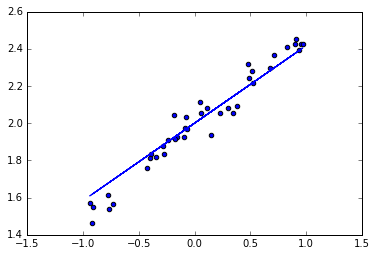

In [30]:
Y_pred = model.predict(X_test)
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred)
plt.show()